# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rifky Maulana Pasaribu]
- **Email:** [rifkymp0@gmail.com]
- **ID Dicoding:** [Rifky Maulana Pasaribu]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana rata-rata penyewaan sepeda pada setiap jamnya, dan manakah yang paling tertinggi?
- Pertanyaan 2: bagaimana rata-rata penyewaan sepeda dengan perbandingan 2 data pada field workingday dan holiday

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
data_day= pd.read_csv("data/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
data_hour= pd.read_csv("data/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada data_day diketahui bahwa datanya adalah bagaimana penyewaan dalam bentuk hari direkam
- pada data_hour diketahui datanya untuk penyewaan dalam bentuk jam dan lebih spesifik (0-23)

### Assessing Data

In [8]:
print("jumlah duplikasi data", data_day.duplicated().sum())
data_day.info()
data_day.describe()

jumlah duplikasi data 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
print("jumlah duplikasi data", data_hour.duplicated().sum())
data_hour.info()
data_hour.describe()

jumlah duplikasi data 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada saat Assessing data pada data_day, daya melihat bahwa dteday masih berbentuk objek dan belum diubah kedalam bentuk date
- pada saat Assessing data pada data_hour, saya juga melihat dteday masih berbentuk objek

### Cleaning Data

In [13]:
data_day["dteday"]= pd.to_datetime(data_day["dteday"])
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
data_hour["dteday"]= pd.to_datetime(data_hour["dteday"])
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Disini saya telah membersihkan data dengan mengubah format objek pada field dteday menjadi datetime64[ns] dan akan memasuki tahap EDA

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
data_total_jam = data_hour.groupby('hr').agg({'cnt': 'sum'}).reset_index()
data_total_jam = data_total_jam.sort_values(by='cnt', ascending=False)
data_total_jam  #disini saya mengurutkan penyewaan pada jam 0-23 diurut dari yang terbanyak

,hr,cnt
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


In [16]:
data_rata_rata_jam = data_hour.groupby('hr').agg({'cnt': 'mean'}).reset_index()
data_rata_rata_jam = data_rata_rata_jam.sort_values(by='cnt', ascending=False)
data_rata_rata_jam #disini saya mencari rata rata penyewaan sepeda setiap jamnya dengan mengurutkan dari yang terbesar

,hr,cnt
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352
13,13,253.661180
12,12,253.315934
15,15,251.233196
14,14,240.949246
20,20,226.030220


In [24]:
# Menghitung rata-rata sewa berdasarkan hari libur
rata_rata_sewa = data_day.groupby('holiday')['cnt'].mean().reset_index()
rata_rata_sewa['holiday'] = rata_rata_sewa['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})

# Menghitung rata-rata sewa berdasarkan hari kerja
rata_rata_workday = data_day.groupby('workingday')['cnt'].mean().reset_index()
rata_rata_workday['workingday'] = rata_rata_workday['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

# Menentukan jenis hari (day_type) berdasarkan kombinasi holiday dan workingday
data_day['day_type'] = 'Unknown'
data_day.loc[(data_day['holiday'] == 0) & (data_day['workingday'] == 1), 'day_type'] = 'Working Day'
data_day.loc[(data_day['holiday'] == 1), 'day_type'] = 'Holiday'
data_day.loc[(data_day['holiday'] == 0) & (data_day['workingday'] == 0), 'day_type'] = 'Weekend/Non-Working'

# Menghitung rata-rata sewa berdasarkan jenis hari (day_type)
rata_rata_day_type = data_day.groupby('day_type')['cnt'].mean().reset_index()

# Menampilkan hasil
rata_rata_sewa
rata_rata_workday
rata_rata_day_type

,day_type,cnt
0,Holiday,156.870000
1,Weekend/Non-Working,183.852014
2,Working Day,193.207754


In [18]:
total_day_type = data_day.groupby('day_type')['cnt'].sum().reset_index()
total_day_type = total_day_type.rename(columns={'cnt': 'total_penyewaan'})

total_day_type #disini saya mencari total seluruh dari dari holiday, Weekend/Non-Working(tanggal merah), working day

,day_type,total_penyewaan
0,Holiday,78435
1,Weekend/Non-Working,921834
2,Working Day,2292410


**Insight:**
- pada 'data_total_jam' diketahui pada jam 17 adalah penyewaan terbanyak dari semua jam, yang menunjukkan orang-orang cenderung menyewa sepeda pada saat setelah pulang kerja
- pada 'rata_rata_sewa' diketahui penyewaan terbanyak terjadi saat working day

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana rata-rata penyewaan sepeda pada setiap jamnya, dan manakah yang paling tertinggi?

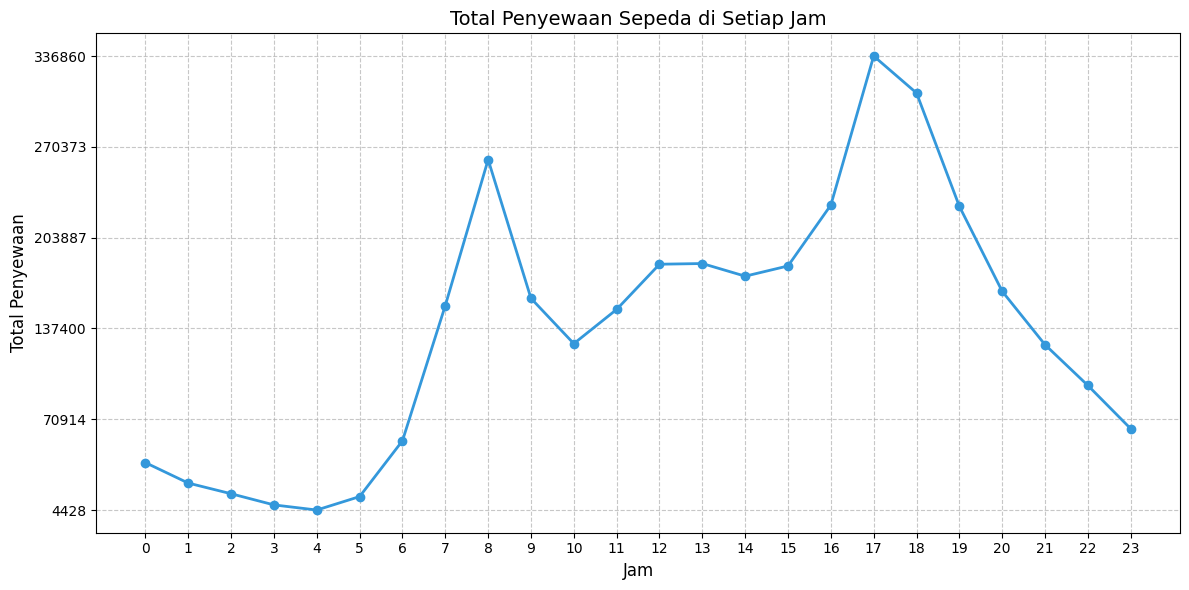

In [25]:
data_sorted = data_total_jam.sort_values(by="hr")

plt.figure(figsize=(12, 6))

plt.plot(data_sorted["hr"], data_sorted["cnt"], marker='o', linewidth=2, color='#3498db')

plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.title("Total Penyewaan Sepeda di Setiap Jam", fontsize=14)

min_val = data_total_jam["cnt"].min()
max_val = data_total_jam["cnt"].max()

yticks = np.linspace(min_val, max_val, 6).astype(int)
plt.yticks(yticks)

plt.xticks(range(24))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

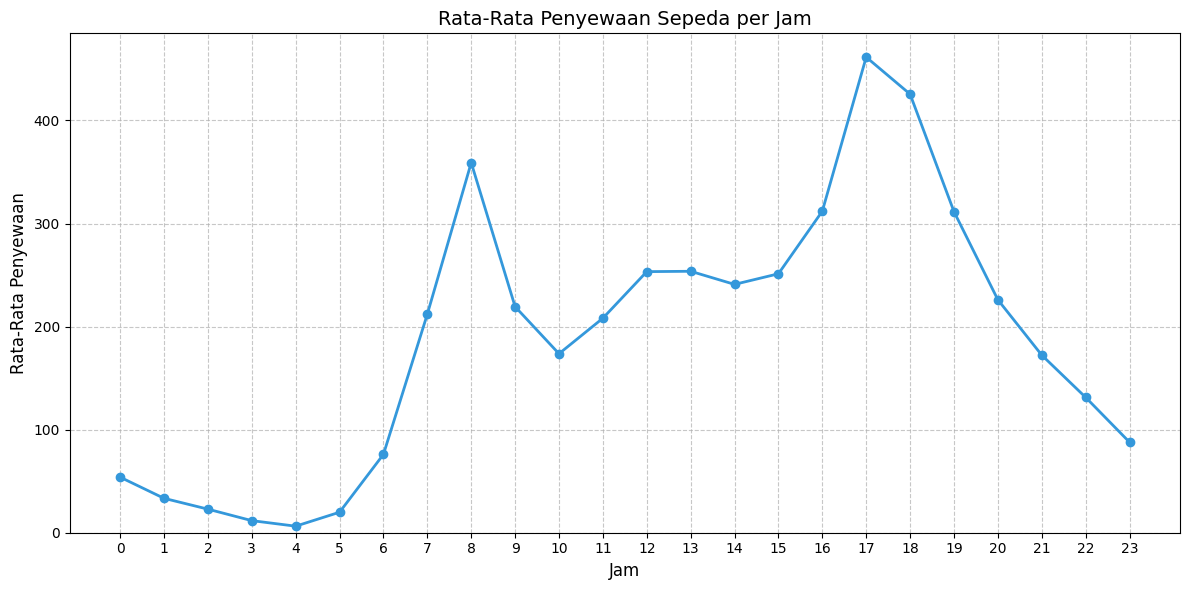

In [26]:
data_by_hour = data_rata_rata_jam.sort_values(by='hr')

plt.figure(figsize=(12, 6))

plt.plot(data_by_hour['hr'], data_by_hour['cnt'], marker='o', linewidth=2, color='#3498db')

plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-Rata Penyewaan', fontsize=12)
plt.title('Rata-Rata Penyewaan Sepeda per Jam', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(range(24))
max_val = data_by_hour['cnt'].max() * 1.05
plt.ylim(0, max_val)
plt.tight_layout()

plt.show()

### Pertanyaan 2: bagaimana rata-rata penyewaan sepeda dengan perbandingan 2 data pada field workingday dan holiday

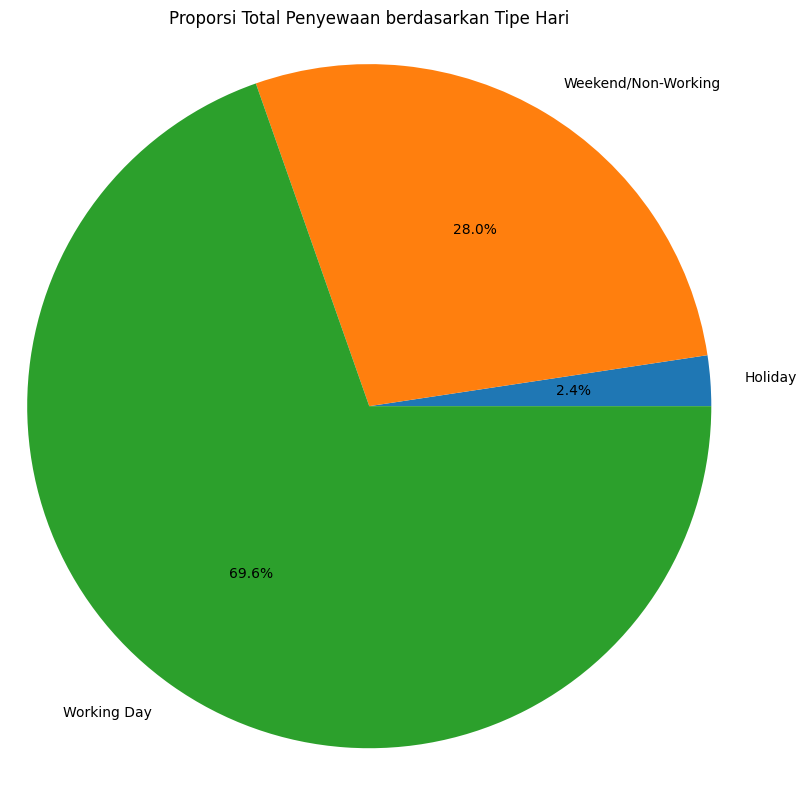

In [27]:
total_day_type = data_day.groupby('day_type')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(total_day_type['cnt'], labels=total_day_type['day_type'], autopct='%1.1f%%')
plt.title('Proporsi Total Penyewaan berdasarkan Tipe Hari')
plt.axis('equal')
plt.tight_layout()
plt.show()

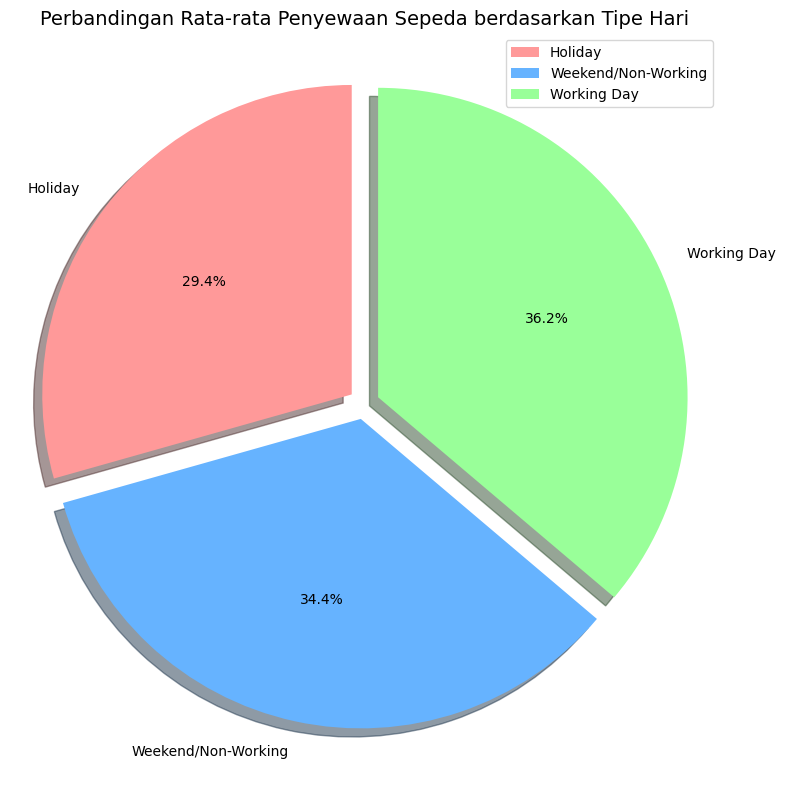

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(rata_rata_day_type['cnt'], 
        labels=rata_rata_day_type['day_type'], 
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=[0.05] * len(rata_rata_day_type),
        colors=['#ff9999','#66b3ff','#99ff99'])

plt.title('Perbandingan Rata-rata Penyewaan Sepeda berdasarkan Tipe Hari', fontsize=14)
plt.axis('equal')  

plt.legend(rata_rata_day_type['day_type'], loc="best")
plt.tight_layout()
plt.show()

**Insight:**
- pada total penyewaan disetiap jam dan rata-rata penyewaan disetiap jam, diketahui bahwa jam 17 adalah yang tertinggi dan 4 terendah
- pada perbandingan holiday vs working day vs weekend/non-workingday terlihat perbedaan yang jelas dari total dan rata-rata yang menunjukkan working day menempati posisi pertama dengan rata rata penyewaan terbanyak

## Analisis Lanjutan (Opsional)

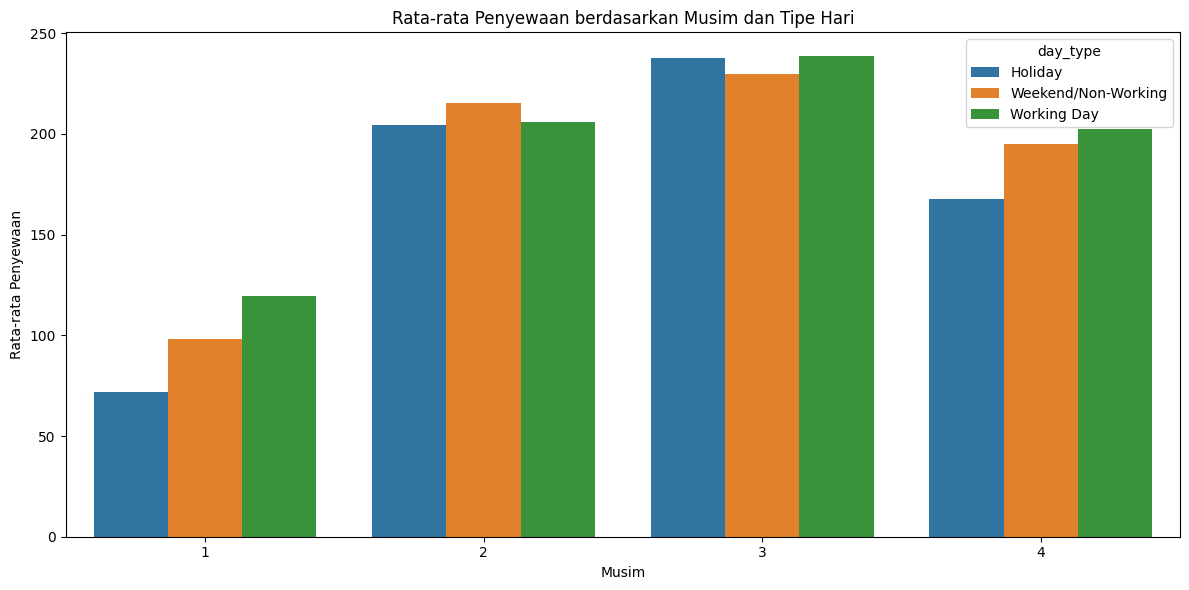

In [29]:
seasonal_analysis = data_day.groupby(['season', 'day_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', hue='day_type', data=seasonal_analysis)
plt.title('Rata-rata Penyewaan berdasarkan Musim dan Tipe Hari')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.tight_layout()
plt.show()

## Conclusion

### bagaimana rata rata penyewaan sepeda pada setiap musimnya?

- berdasarkan pernyataan di README.md pada data diketahui season : season (1:springer, 2:summer, 3:fall, 4:winter), dan kesimpulan saya saat fall season atau musim gugur, orang orang lebih banyak menyewa sepeda dan jika dihubungkang musim gugur identik dengan tepatnya waktu vacation ataupun hari libur untuk anak sekolahan dan kuliah dan keluarga, yang mengakibatkan naiknya penyewaan pada hari holiday working day maupun weekend/non-workingday. dan saya simpulkan banyak masyarakat yang sedang liburan disaat itu.

In [31]:
merged_data = data_hour.merge(data_day, on='dteday', how='left', suffixes=('_hour', '_day'))

merged_data.to_csv('merged_data.csv', index=False)
print("\nData berhasil disimpan ke 'merged_data.csv'.")


Data berhasil disimpan ke 'merged_data.csv'.


In [32]:
merged_data.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,day_type
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Weekend/Non-Working
1,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,Weekend/Non-Working
2,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,Weekend/Non-Working
3,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,Weekend/Non-Working
4,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,Weekend/Non-Working
